In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import seaborn as sns 
plt.rcParams['figure.figsize'] = [16, 12]
import math

In [13]:
image = cv2.imread("./3.jpg")

def mouse_callback(event, x, y, flags, param):
    global positions
    global image 
    
    if event == cv2.EVENT_LBUTTONDOWN:
        positions.append((x, y))
        cv2.circle(image, positions[-1], 8, (91, 80, 242), -1)

cv2.namedWindow("Image")
cv2.setMouseCallback("Image", mouse_callback)
positions = []

while False:
    # Display the image
    cv2.imshow("Image", image)
    # Check for key press
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        cv2.destroyWindow("Image")
        cv2.destroyAllWindows()
        cv2.waitKey(1)
        break

# Close all windows
cv2.destroyAllWindows()

positions = np.array([[ 597,  854],
 [ 164,  487],
 [ 300,  997],
 [  51,  499],
 [ 502,   50],
 [ 427,   90],
 [ 502,  369],
 [ 428,  363],
 [ 857,  667],
 [1165,  788],
 [ 856,  760],
 [1165,  917]])
position = np.reshape(positions,(-1,2))
print(position)

[[ 597  854]
 [ 164  487]
 [ 300  997]
 [  51  499]
 [ 502   50]
 [ 427   90]
 [ 502  369]
 [ 428  363]
 [ 857  667]
 [1165  788]
 [ 856  760]
 [1165  917]]


[[ 597  854]
 [ 164  487]
 [ 300  997]
 [  51  499]
 [ 502   50]
 [ 427   90]
 [ 502  369]
 [ 428  363]
 [ 857  667]
 [1165  788]
 [ 856  760]
 [1165  917]]


/var/folders/6n/80j8px4d0699k87fdts504q80000gn/T/ipykernel_11763/3738837770.py:5: RuntimeWarning: divide by zero encountered in true_divide
  m = (y2 - y1) / (x2 - x1)


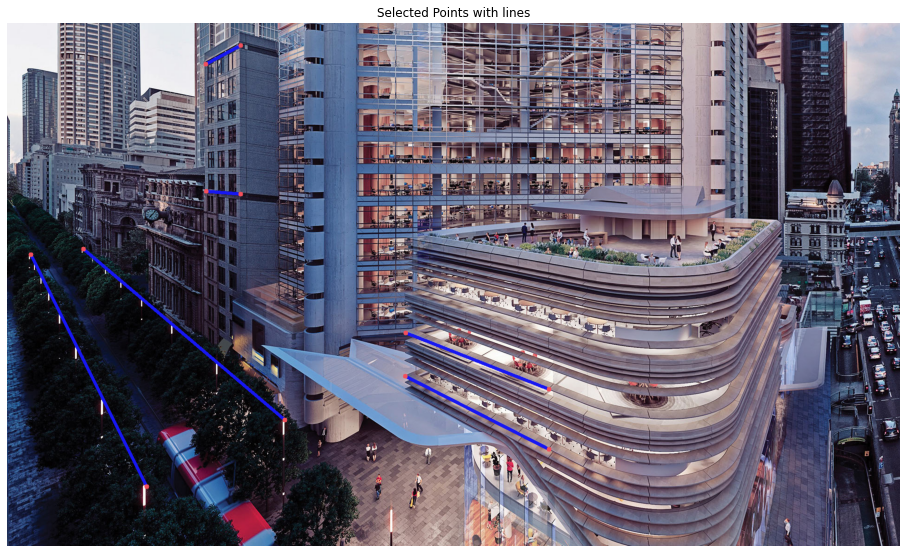

In [14]:
lines = np.reshape(position,(-1,2,2,2))

def calculate_line_equation(line):
    (x1, y1), (x2, y2) = line
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1
    return m, b
# Calculate the equation for each line
equations = []
for line in lines:
    m, b = calculate_line_equation(line)
    equations.append((m, b))
    
equations = np.array(equations)

print(position)    
for i in range(1,len(positions),2):
    cv2.line(image,pt1=positions[i-1],pt2=positions[i],color=(242,23,23),thickness=6)

for pos in positions:
    cv2.circle(image, pos, 5, (91, 80, 242), -1) 
    
plt.imshow(image[:,:,::-1])
plt.axis("off")  
plt.title("Selected Points with lines")
plt.show()

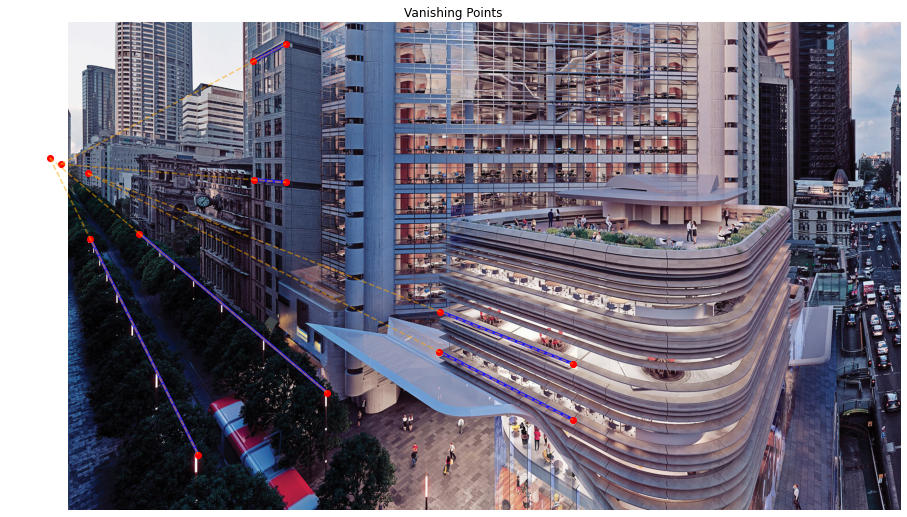

[array([-42.52104208, 311.95791583]),
 array([-17.19354839, 326.90322581]),
 array([ 45.5336008 , 348.20962889])]

In [15]:
def GetVanishingPoint(Lines):
    VanishingPoint = None
    MinError = 100000000000
    for i in range(len(Lines)):
        for j in range(i+1, len(Lines)):
            m1, c1 = Lines[i][0], Lines[i][1]
            m2, c2 = Lines[j][0], Lines[j][1]
            if m1 != m2:
                x0 = (c1 - c2) / (m2 - m1)
                y0 = m1 * x0 + c1

                err = 0
                for k in range(len(Lines)):
                    m, c = Lines[k][0], Lines[k][1]
                    m_ = (-1 / m)
                    c_ = y0 - m_ * x0

                    x_ = (c - c_) / (m_ - m)
                    y_ = m_ * x_ + c_
                    l = math.sqrt((y_ - y0)**2 + (x_ - x0)**2)
                    err += l**2

                err = math.sqrt(err)
                if MinError > err:
                    MinError = err
                    VanishingPoint = [x0, y0]
                
    return VanishingPoint

def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y


vanishing_points = []
w,h,I = 3,1,0
plt.imshow(image[:,:,::-1])
for i in range(0,len(positions)-3,4):
    I+=1
    #plt.subplot(w,h,I)
    A = np.array(line_intersection(position[i:i+2],position[i+2:i+4]))
    vanishing_points.append(A)
    X_range = [A[0]]
    Y_range = [A[1]]
    for p in position[i:i+4]:
        X_range.append(p[0])
        Y_range.append(p[1])
    plt.scatter(X_range,Y_range,color="red")
    plt.plot(X_range[:3],Y_range[:3],"--",color="orange",alpha=.5)
    del X_range[1],X_range[1],Y_range[1],Y_range[1]
    plt.plot(X_range,Y_range,"--",color="orange",alpha=.5)
    
plt.axis("off")
plt.title("Vanishing Points")    
plt.show()
vanishing_points

In [16]:
def compute_w(vp1, vp2, vp3):
    a0 = np.array([[ (vp1[0]*vp2[0]) + (vp1[1] * vp2[1]) ],[ vp1[1] + vp1[0] ],[ vp2[1] + vp1[1] ], [1]])
    a1 = np.array([[ (vp1[0]*vp3[0]) + (vp1[1] * vp3[1]) ],[ vp1[1] + vp1[0] ],[ vp3[1] + vp1[1] ],[1]])
    a2 = np.array([[ (vp3[0]*vp2[0]) + (vp3[1] * vp2[1]) ],[ vp3[1] + vp3[0] ],[ vp2[1] + vp3[1] ],[1]])
    A = np.array([a0, a1, a2]).squeeze()
    U, S, V = np.linalg.svd(A)
    soln = V[-1]
    W = np.array([[soln[0], 0, soln[1]],[0, soln[0], soln[2]],[soln[1], soln[2], soln[3]]])
    return W
w = compute_w(*vanishing_points)



In [17]:
def make_positive_definite(A, alpha=0.01):
    n = A.shape[0]
    A_reg = A + alpha*np.eye(n)
    eigvals = np.linalg.eigvals(A_reg)
    while np.any(eigvals <= 0):
        alpha *= 10
        A_reg = A + alpha*np.eye(n)
        eigvals = np.linalg.eigvals(A_reg)
    return A_reg

A = np.array(w)
A_pos_def = make_positive_definite(A)

In [18]:
new_w = A_pos_def
l = np.linalg.cholesky(new_w)
l_inv = np.linalg.inv(l)
k = np.linalg.inv(l_inv.T)
print("W:",w,end="\n-----------------------\n",sep="\n")
print("Positive semi-definite:",A_pos_def,end="\n-----------------------\n",sep="\n")
print("k:",k,end="\n-----------------------\n",sep="\n")

W:
[[ 4.10822608e-05  0.00000000e+00 -1.17852167e-03]
 [ 0.00000000e+00  4.10822608e-05 -7.67308896e-03]
 [-1.17852167e-03 -7.67308896e-03  9.99969866e-01]]
-----------------------
Positive semi-definite:
[[ 0.01004108  0.         -0.00117852]
 [ 0.          0.01004108 -0.00767309]
 [-0.00117852 -0.00767309  1.00996987]]
-----------------------
k:
[[ 0.1002052   0.         -0.01176108]
 [ 0.          0.1002052  -0.07657376]
 [ 0.          0.          1.00198204]]
-----------------------
